<a href="https://colab.research.google.com/github/BossDever/DataVisualization/blob/main/6404022630308_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1) Using Matplotlib, create data visualizations from the data collected from a given Google
Form. Students should write Python statements to:
1. Read a provided Excel file.
2. If the read data is not clean, perform data cleansing.
3. Create charts to draw insights from the provided data.

Draw the chart

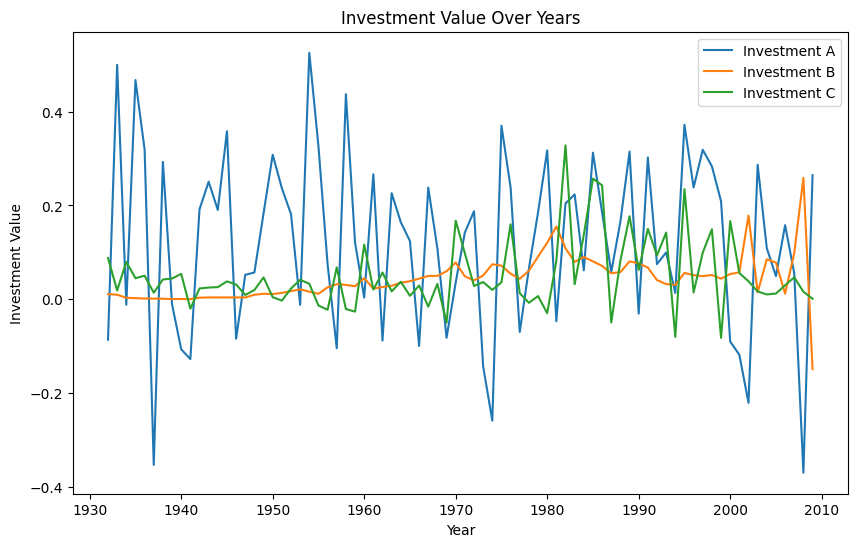

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# โหลดข้อมูลจากไฟล์ Excel, ข้ามแถวที่ไม่ต้องการ
data = pd.read_excel('/content/Historicalinvesttemp.xlsx', skiprows=10)

# ตั้งชื่อคอลัมน์ใหม่
data.columns = ['Year', 'Investment_A', 'Investment_B', 'Investment_C']

# แปลงคอลัมน์ 'Year' เป็นตัวเลขและทำความสะอาดข้อมูล
data['Year'] = pd.to_numeric(data['Year'], errors='coerce')
data['Investment_A'] = pd.to_numeric(data['Investment_A'], errors='coerce')
data['Investment_B'] = pd.to_numeric(data['Investment_B'], errors='coerce')
data['Investment_C'] = pd.to_numeric(data['Investment_C'], errors='coerce')

# ลบแถวที่มีค่า NaN
data.dropna(inplace=True)

# วาดกราฟเส้น
plt.figure(figsize=(10, 6))
plt.plot(data['Year'], data['Investment_A'], label='Investment A')
plt.plot(data['Year'], data['Investment_B'], label='Investment B')
plt.plot(data['Year'], data['Investment_C'], label='Investment C')

# ตั้งค่าป้ายชื่อและชื่อกราฟ
plt.xlabel('Year')
plt.ylabel('Investment Value')
plt.title('Investment Value Over Years')
plt.legend()

# แสดงกราฟ
plt.show()


Describe a key finding or pattern you noticed from analyzing the data visualization.

จากการวิเคราะห์แผนภูมิที่วาดขึ้น, หนึ่งในการค้นพบหลักคือ:

- มีความผันผวนอย่างมากในมูลค่าการลงทุนของ 'Investment A', 'Investment B', และ 'Investment C' ตลอดระยะเวลาที่แสดงในข้อมูล. บางช่วงเวลามีการเปลี่ยนแปลงมูลค่าอย่างรวดเร็วและมีขนาดใหญ่, ซึ่งอาจบ่งบอกถึงความเสี่ยงหรือความผันผวนของสภาพแวดล้อมตลาดในช่วงนั้น.

- การลงทุนเหล่านี้ดูเหมือนจะไม่มีการเคลื่อนไหวไปในทิศทางเดียวกันเสมอไป. นี่แสดงให้เห็นว่าอาจมีปัจจัยอื่นๆ นอกเหนือจากสภาพแวดล้อมตลาดโดยรวมที่มีอิทธิพลต่อการลงทุนแต่ละประเภท.

- แนวโน้มเหล่านี้มีความสำคัญในการวางแผนกลยุทธ์การลงทุนเพื่อจัดการความเสี่ยงและคาดการณ์ผลตอบแทนในอนาคต.

ความเข้าใจเหล่านี้สามารถช่วยในการตัดสินใจการลงทุนหรือการวางแผนกลยุทธ์ทางการเงินได้อย่างมีข้อมูลที่ดี.

2) Find PM2.5 data from reliable sources to create data visualizations showing PM2.5 levels
in Bangkok from January 1, 2023 to present.

Specify the sources of PM2.5 data ..................................................................................................................

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd


# Load the uploaded Excel file
file_path = '/content/ค่าฝุ่น PM2.5  2023.xlsx'
pm25_data = pd.read_excel(file_path)

# Adjusting the dataframe structure
pm25_data.columns = pm25_data.iloc[0]  # Set the first row as header
pm25_data = pm25_data.drop(pm25_data.index[0])  # Drop the first row

# Renaming columns with English month abbreviations for clarity
month_mapping = {
    'ม.ค.': 'Jan', 'ก.พ.': 'Feb', 'มี.ค.': 'Mar', 'เม.ย.': 'Apr',
    'พ.ค.': 'May', 'มิ.ย.': 'Jun', 'ก.ค.': 'Jul', 'ส.ค.': 'Aug',
    'ก.ย.': 'Sep', 'ต.ค.': 'Oct', 'พ.ย.': 'Nov', 'ธ.ค.': 'Dec'
}
pm25_data = pm25_data.rename(columns=month_mapping)

# Filtering out non-relevant rows
pm25_data_filtered = pm25_data[pm25_data.iloc[:, 0].apply(lambda x: str(x).isdigit())]

# Correcting the melting process
pm25_data_filtered.columns = ['Day'] + list(pm25_data_filtered.columns[1:])

# Melting the dataframe with the corrected structure
pm25_data_melted_corrected = pm25_data_filtered.melt(id_vars=['Day'], var_name='Month', value_name='PM2.5')

# Creating a date column by combining day and month
pm25_data_melted_corrected['Day'] = pm25_data_melted_corrected['Day'].astype(int).astype(str)
pm25_data_melted_corrected['Date'] = pd.to_datetime(pm25_data_melted_corrected['Day'] + ' ' + pm25_data_melted_corrected['Month'] + ' 2023', format='%d %b %Y', errors='coerce')

# Removing rows with invalid dates
pm25_data_melted_clean_corrected = pm25_data_melted_corrected.dropna(subset=['Date'])


Draw the chart

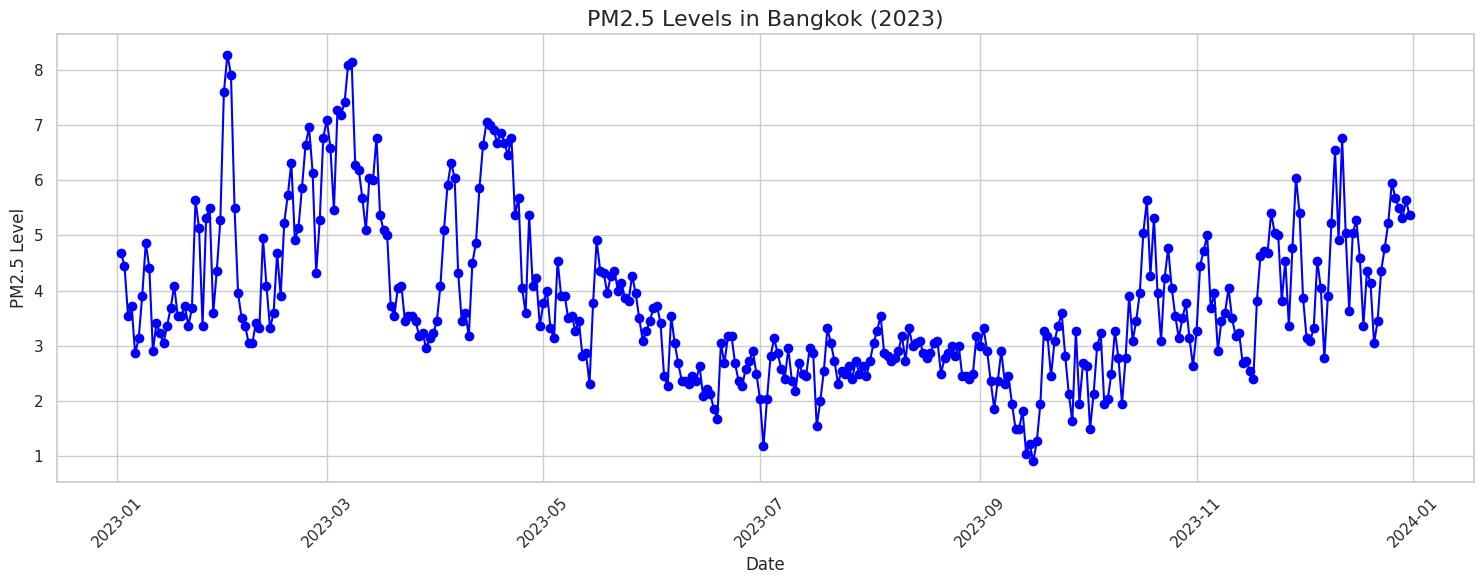

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the plot style
sns.set(style="whitegrid")

# Creating a line plot of PM2.5 levels over time
plt.figure(figsize=(15, 6))
plt.plot(pm25_data_melted_clean_corrected['Date'], pm25_data_melted_clean_corrected['PM2.5'], color='blue', marker='o')
plt.title('PM2.5 Levels in Bangkok (2023)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('PM2.5 Level', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()
